#User Sentiment before, during, after transformation

Loading the postDataset and comment dataset:

In [3]:
import sys
sys.path.append('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')
import redditDataIO
import pandas as pd
import numpy as np
import os
os.chdir('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')

In [19]:
#commentData = redditDataIO.loadData('userCommentData_Sentiment')
fullWeightLossData = redditDataIO.loadData('weightLossComment_dietTime')

In [21]:
fullWeightLossData

,index,level_0,index_x,commentScore,controversiality,body,subreddit,link_title,link_id,commentDateEpoch,...,weightChangeRate,fitnessCommentCount,totalCommentCount,fitnessCommentFraction,postTextSentiment,dietStartDateEpoch,beforeDiet,afterDiet,duringDiet,dietTime
0,0,0,0,2,0,Lenny is the man. I'm good friends with his so...,funny,Millionaires In America (Not OC),t3_2u8mg2,1422670000,...,-8.035710,34,46,0.739130,0,1358810000,0,1,0,after
1,1,0,0,2,0,Lenny is the man. I'm good friends with his so...,funny,Millionaires In America (Not OC),t3_2u8mg2,1422670000,...,-5.357140,34,46,0.739130,3,1357770000,0,1,0,after
2,2,0,0,2,0,Lenny is the man. I'm good friends with his so...,funny,Millionaires In America (Not OC),t3_2u8mg2,1422670000,...,-0.548502,34,46,0.739130,1,1370980000,0,1,0,after
3,3,1,1,11,0,"CondoInternet, brobeans.",technology,SpaceX confirms $1 billion funding round with ...,t3_2t3giy,1421820000,...,-8.035710,34,46,0.739130,0,1358810000,0,1,0,after
4,4,1,1,11,0,"CondoInternet, brobeans.",technology,SpaceX confirms $1 billion funding round with ...,t3_2t3giy,1421820000,...,-5.357140,34,46,0.739130,3,1357770000,0,1,0,after
5,5,1,1,11,0,"CondoInternet, brobeans.",technology,SpaceX confirms $1 billion funding round with ...,t3_2t3giy,1421820000,...,-0.548502,34,46,0.739130,1,1370980000,0,1,0,after
6,6,2,2,2,0,"Baller, thanks!! Happy new year!",Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420080000,...,-8.035710,34,46,0.739130,0,1358810000,0,1,0,after
7,7,2,2,2,0,"Baller, thanks!! Happy new year!",Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420080000,...,-5.357140,34,46,0.739130,3,1357770000,0,1,0,after
8,8,2,2,2,0,"Baller, thanks!! Happy new year!",Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420080000,...,-0.548502,34,46,0.739130,1,1370980000,0,1,0,after
9,9,3,3,1,0,"Awesome, thanks for the advice!",Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420050000,...,-8.035710,34,46,0.739130,0,1358810000,0,1,0,after


In [7]:
weightLossSubredditData['beforeDiet'] = weightLossSubredditData['commentDateEpoch'] < weightLossSubredditData['dietStartDateEpoch']
weightLossSubredditData['afterDiet'] = weightLossSubredditData['commentDateEpoch'] > (weightLossSubredditData['dietStartDateEpoch'] + weightLossSubredditData['timeElapsedEpoch'])
weightLossSubredditData['duringDiet'] = weightLossSubredditData.apply(lambda x: 0 if x['beforeDiet'] or x['afterDiet'] else 1, axis=1)
weightLossSubredditData['beforeDiet'] = weightLossSubredditData.apply(lambda x: 1 if x['beforeDiet'] else 0, axis=1)
weightLossSubredditData['afterDiet'] = weightLossSubredditData.apply(lambda x: 1 if x['afterDiet'] else 0, axis=1) 

In [8]:
weightLossSubredditData['dietTime'] = weightLossSubredditData.apply(lambda x: x['beforeDiet']*'before' + x['afterDiet']*'after' + x['duringDiet']*'during', axis=1)

Let's output this to a combined SQL table:

In [19]:
redditDataIO.exportDataToSQL(weightLossSubredditData, tableName='weightLossComment_dietTime')

Index([u'level_0', u'index_x', u'commentScore', u'controversiality', u'body', u'subreddit', u'link_title', u'link_id', u'commentDateEpoch', u'username', u'userid', u'commentSentimentScore', u'index_y', u'permalink', u'postText', u'name', u'author', u'url', u'postNumComments', u'endWeight', u'title', u'postDateEpoch', u'height', u'weightUnit', u'postScore', u'weightChange', u'over_18', u'timeElapsed', u'gender', u'timeUnit', u'startWeight', u'age', u'currentBMI', u'previousBMI', u'timeElapsedEpoch', u'timeElapsedMonths', u'weightChangeRate', u'fitnessCommentCount', u'totalCommentCount', u'fitnessCommentFraction', u'postTextSentiment', u'dietStartDateEpoch', u'beforeDiet', u'afterDiet', u'duringDiet', u'dietTime'], dtype='object')
Exported Data to SQL Table (Name: weightLossComment_dietTime)


/Users/alexsutherland/anaconda/lib/python2.7/site-packages/pymysql/cursors.py:134: Warning: Unknown table 'redditweightdatabase.weightlosscomment_diettime'
  result = self._query(query)


We need to segment the users into large losers and small losers:

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

def plotDistribution(data, column, binSize = 5):
    plt.hist(data[column].values,bins=np.arange(data[column].min()-5,data[column].max()+5,binSize), facecolor='g', alpha=0.8)
    plt.suptitle('Distribution of ' + column, fontsize=20)
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Count', fontsize=16)

In [24]:
weightLossSubredditData['weightChange'].describe()

count    1228445.000000
mean         -55.088537
std           37.255926
min         -385.000000
25%          -72.000000
50%          -47.000000
75%          -30.000000
max           -5.000000
dtype: float64

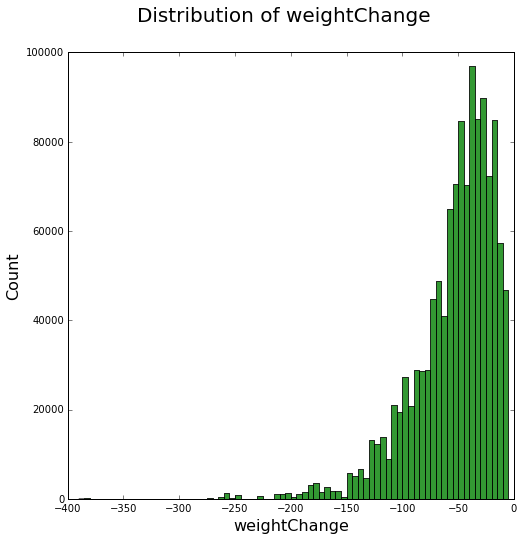

In [25]:
plotDistribution(weightLossSubredditData, column='weightChange')

Let's gate the large and small losers by the 75th and 25th percentile: 

In [27]:
largeLosers = weightLossSubredditData.ix[weightLossSubredditData['weightChange'] < -70,:]
smallLosers = weightLossSubredditData.ix[weightLossSubredditData['weightChange'] > -30,:]

Let's group by the subreddit and dietTime, calculating the mean sentiment score:

In [29]:
#weightLostByTime = pd.DataFrame(largeLosers.groupby(['dietTime'])['sentimentScores'].mean())
largeWeightLostByTime = pd.DataFrame(index=[['after','before','during'],['large','large','large']])
largeWeightLostByTime['count'] = largeLosers.groupby(['dietTime'])['commentSentimentScore'].count().values
largeWeightLostByTime

,,count
after,large,137317
before,large,58367
during,large,119484


In [32]:
smallWeightLostByTime = pd.DataFrame(index=[['after','before','during'],['small','small','small']])
smallWeightLostByTime['count'] = smallLosers.groupby(['dietTime'])['commentSentimentScore'].count().values
smallWeightLostByTime

,,count
after,small,124699
before,small,112584
during,small,65821


In [33]:
weightLostByTime = pd.concat([smallWeightLostByTime, largeWeightLostByTime])
weightLostByTime

,,count
after,small,124699
before,small,112584
during,small,65821
after,large,137317
before,large,58367
during,large,119484


In [34]:
weightLostByTimeUnstack = weightLostByTime.reset_index()
weightLostByTimeUnstack.columns = ['dietTime','weightLossAmount','count']
weightLostByTimeUnstack

,dietTime,weightLossAmount,count
0,after,small,124699
1,before,small,112584
2,during,small,65821
3,after,large,137317
4,before,large,58367
5,during,large,119484


In [35]:
largeLosers.shape

(315168, 46)

In [36]:
smallLosers.shape

(303104, 46)

Let's plot this:

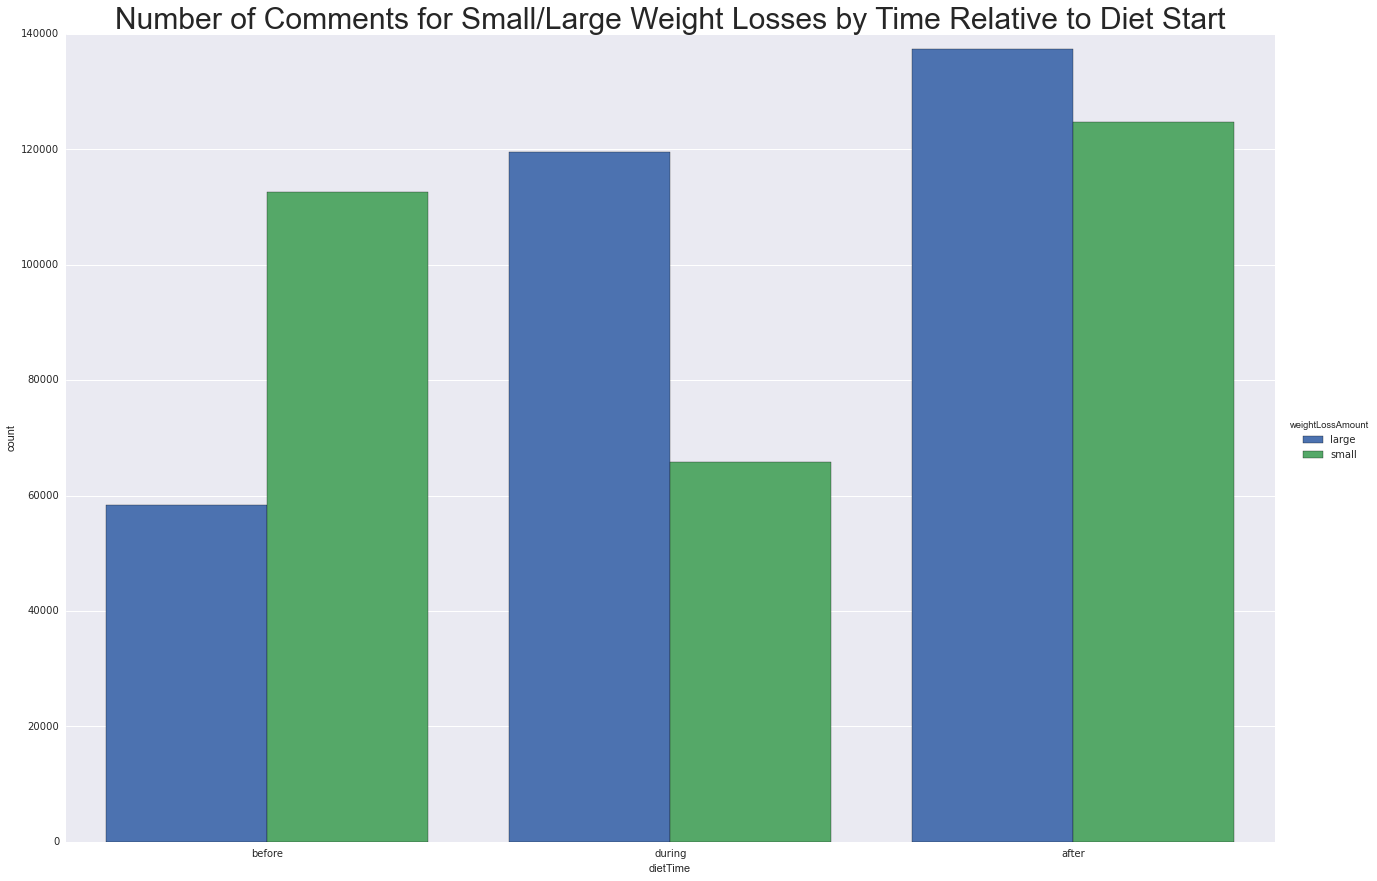

In [37]:
import seaborn as sns


sns.factorplot("dietTime", "count", "weightLossAmount", weightLostByTimeUnstack, kind="bar", x_order=['before','during','after'], size=12, aspect=1.5)
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
plt.gca().set_title('Number of Comments for Small/Large Weight Losses by Time Relative to Diet Start')
#sns.barplot(x=np.array([3,1,2]),y=[weightLostByTime['smallCount'].values, weightLostByTime['largeCount'].values])